In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile #to handle zip file
import pandas as pd
import numpy as np

In [2]:
os.listdir('UTKFace')

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_20170110220033115.jpg.chip.jpg',
 '10_0_0_20170110220111082.jpg.chip.jpg',
 '10_0_0_20170110220235233.jpg.chip.jpg',
 '10_0_0_20170110220251986.jpg.chip.jpg',
 '10_0_0_20170110220255346.jpg.chip.jpg',
 '10_0_0_20170110220316298.jpg.chip.jpg',
 '10_0_0_20170110220403810.jpg.chip.jpg',
 '10_0_0_20170110220447314.jpg.chip.jpg',
 '10_0_0_20170110220503946.jpg.chip.jpg',
 '10_0_0_20170110224406532.jpg.chip.jpg',
 '10_0_0_2017011022441603

In [3]:
path2 = os.path.join('UTKFace')
path2[6]

'e'

In [4]:
len(os.listdir(path2))

11960

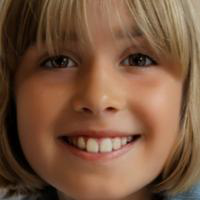

In [5]:
ld_img = load_img(path2+'\\13_1_0_20170109201622416.jpg.chip.jpg')
ld_img

In [6]:
samp=[]
img_name=[]
for img_filename in os.listdir(path2):
        if img_filename.endswith(".jpg"):
            labels = img_filename.split("_")[:-1]
            samp.append(labels)
            img_name.append(img_filename)

In [7]:
df = pd.DataFrame(samp, columns=['age', 'gender','race'])
df['name']=img_name
df

,age,gender,race,name
0,100,0,0,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,0,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,0,100_1_0_20170119212053665.jpg.chip.jpg
3,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg
4,100,1,2,100_1_2_20170112213615815.jpg.chip.jpg
...,...,...,...,...
11955,9,1,3,9_1_3_20161220222856346.jpg.chip.jpg
11956,9,1,3,9_1_3_20170104222949455.jpg.chip.jpg
11957,9,1,4,9_1_4_20170103200637399.jpg.chip.jpg
11958,9,1,4,9_1_4_20170103200814791.jpg.chip.jpg


In [8]:
df.describe(include="all")

,age,gender,race,name
count,11960,11960,11958,11960
unique,101,2,5,11960
top,26,0,0,100_0_0_20170112213500903.jpg.chip.jpg
freq,1127,6272,5127,1


In [9]:
df.age.unique()

array(['100', '101', '105', '10', '110', '116', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '1', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '3', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '4', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '5', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '6', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '7', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '8', '90', '91', '92', '93', '95',
       '96', '99', '9'], dtype=object)

In [10]:
df.race.unique()

array(['0', '2', '1', '3', '4', None], dtype=object)

In [11]:
df.gender.unique()

array(['0', '1'], dtype=object)

In [12]:
df.isnull()

,age,gender,race,name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11955,False,False,False,False
11956,False,False,False,False
11957,False,False,False,False
11958,False,False,False,False


In [13]:
batch_size = 100
epochs = 11
IMG_HIEGHT = 150
IMG_WIDHT = 150

images = np.array(df['name'])  # Assuming 'image' column contains image data
labels = df['age'].values  # Assuming 'label' column contains label data
# Step 3: Prepare input and target data
labels

array(['100', '100', '100', ..., '9', '9', '9'], dtype=object)

In [14]:
len(labels)

11960

In [15]:
img_path=[]
for item in os.listdir(path2):  
    img=load_img(path2+'\\'+item,target_size=(IMG_HIEGHT,IMG_WIDHT))  #resize to 150x150
    img_array = img_to_array(img)  #convert image to array format
    img_array = img_array / 255.0  #Normalize between 0 and 1
    img_path.append(img_array)     #add images in a list

In [16]:
len(img_path)

11960

In [17]:
image_array = np.array(img_path)

In [18]:
image_array.shape

(11960, 150, 150, 3)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2,8,figsize=(10,10))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

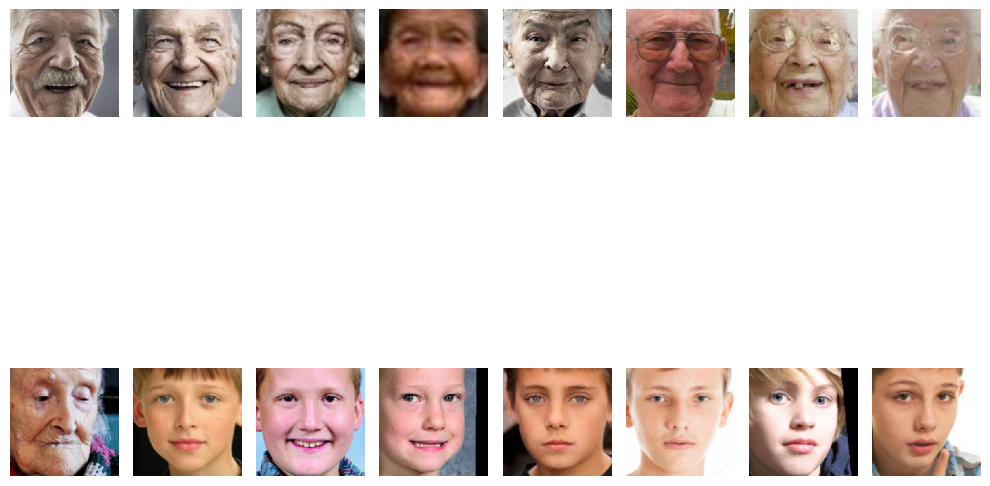

In [20]:
 plotImages(image_array[0:16])

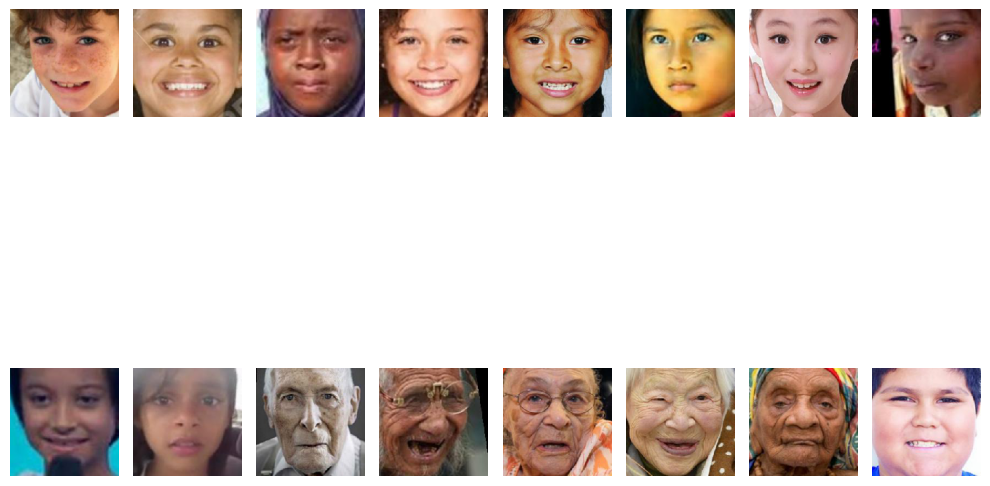

In [21]:
 plotImages(image_array[60:76])

In [22]:
# Convert labels to one-hot encoded vectors
labels1 = tf.keras.utils.to_categorical(labels)
labels1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
len(labels1[0])

117

In [24]:
len(labels1)

11960

In [25]:
model = Sequential([
    Conv2D(15,3,padding='same', activation='relu', input_shape=(IMG_HIEGHT, IMG_WIDHT, 3)),
     MaxPooling2D(), #75
    Conv2D(30,3,padding='same',activation='relu'), #75
    MaxPooling2D(),#37
    Conv2D(30,3,padding='same',activation='relu'),#37
    MaxPooling2D(),#18
    Flatten(),
    Dense(512, activation='relu'),
    Dense(117, activation='softmax')
])  # Adjust the number of output units based on the label type

In [26]:
# Step 5: Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history= model.fit(image_array, labels1, epochs=epochs, batch_size=batch_size)

Epoch 1/11
120/120 [==============================] - 375s 3s/step - loss: 4.0743 - accuracy: 0.0910
Epoch 2/11
120/120 [==============================] - 355s 3s/step - loss: 3.7498 - accuracy: 0.1064
Epoch 3/11
120/120 [==============================] - 245s 2s/step - loss: 3.4384 - accuracy: 0.1426
Epoch 4/11
120/120 [==============================] - 231s 2s/step - loss: 3.1337 - accuracy: 0.1875
Epoch 5/11
120/120 [==============================] - 227s 2s/step - loss: 2.7271 - accuracy: 0.2716
Epoch 6/11
120/120 [==============================] - 231s 2s/step - loss: 2.1819 - accuracy: 0.3989
Epoch 7/11
120/120 [==============================] - 293s 2s/step - loss: 1.5090 - accuracy: 0.5712
Epoch 8/11
120/120 [==============================] - 351s 3s/step - loss: 0.9260 - accuracy: 0.7380
Epoch 9/11
120/120 [==============================] - 381s 3s/step - loss: 0.5382 - accuracy: 0.8569
Epoch 10/11
120/120 [==============================] - 373s 3s/step - loss: 0.3544 - accura

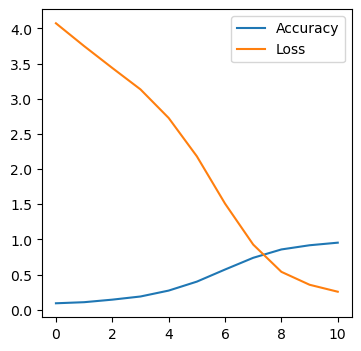

In [28]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)
plt.figure(figsize=(4,4))
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,loss,label='Loss')
plt.legend(loc=0)
plt.show()

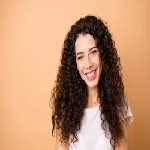

In [29]:
test_img = load_img('girl4.jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))
test_img

In [30]:
test_array = img_to_array(test_img)
test_array = test_array.reshape(1,IMG_HIEGHT,IMG_WIDHT,3)
test_array.shape

(1, 150, 150, 3)

In [31]:
test=model.predict(test_array)

1/1 [==============================] - 10s 10s/step


In [32]:
np.argmax(test)

26

In [33]:
class_name = np.unique(labels)
class_name

array(['1', '10', '100', '101', '105', '11', '110', '116', '12', '13',
       '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83',
       '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93',
       '95', '96', '99'], dtype=object)

In [34]:

#testing cascad
import cv2
import numpy as np
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')
while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_cam = img
    test_cam = cv2.resize(test_cam,(IMG_HIEGHT,IMG_WIDHT))
    test_cam = test_cam.reshape(1,IMG_HIEGHT,IMG_WIDHT,3)
    #iden = []
    pred = np.argmax(model.predict(test_cam))
    #iden.append(int(pred[0][0]))
    #print(iden)
    

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #print(faces.shape)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, str(pred), (x+5,y-5), font, 1, (255,0,0), 4)

    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 75ms/step


In [40]:
model.save("agedetect.h5")